# Step 1:Data Understanding and feature engineering.

# 1. Defining the Question

Business Problem
Aviation safety is a critical concern for both regulatory authorities and airlines. Identifying patterns and factors contributing to aviation accidents can help in developing preventive measures and improving overall safety. The goal of this project is to analyze historical aviation accident data to uncover key insights and trends that could inform safety improvements.

Objectives:

1.Identify common causes of aviation accidents.
2.Analyze trends in accident frequency over time.
3.Determine the impact of weather conditions on accident severity.
4.Assess the effectiveness of different types of aircraft in terms of safety records.

Success Criteria:

Reduction in the number of incidents by implementing preventive measures based on findings.
Improved safety protocols and guidelines for airlines and pilots.
Data-driven recommendations for aircraft manufacturers to enhance safety features.

## Loading the Data

We Import the necessary libraries that will be needed.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
file_path = 'AviationData.csv'
aviation_data = pd.read_csv(file_path)

aviation_data.head(), aviation_data.info()



C:\Users\temp\AppData\Local\Temp\ipykernel_4672\3167753669.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

(         Event.Id Investigation.Type Accident.Number  Event.Date  \
 0  20001218X45444           Accident      SEA87LA080  1948-10-24   
 1  20001218X45447           Accident      LAX94LA336  1962-07-19   
 2  20061025X01555           Accident      NYC07LA005  1974-08-30   
 3  20001218X45448           Accident      LAX96LA321  1977-06-19   
 4  20041105X01764           Accident      CHI79FA064  1979-08-02   
 
           Location        Country   Latitude  Longitude Airport.Code  \
 0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
 1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
 2    Saltville, VA  United States  36.922223 -81.878056          NaN   
 3       EUREKA, CA  United States        NaN        NaN          NaN   
 4       Canton, OH  United States        NaN        NaN          NaN   
 
   Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
 0          NaN  ...          Personal         NaN                  2

In [15]:
# Check for missing values
missing_values = aviation_data.isnull().sum()

# Basic statistics
data_description = aviation_data.describe(include='all')

data_description, missing_values


(              Event.Id Investigation.Type Accident.Number  Event.Date  \
 count            88889              88889           88889       88889   
 unique           87951                  2           88863       14782   
 top     20001212X19172           Accident      CEN22LA149  1984-06-30   
 freq                 3              85015               2          25   
 mean               NaN                NaN             NaN         NaN   
 std                NaN                NaN             NaN         NaN   
 min                NaN                NaN             NaN         NaN   
 25%                NaN                NaN             NaN         NaN   
 50%                NaN                NaN             NaN         NaN   
 75%                NaN                NaN             NaN         NaN   
 max                NaN                NaN             NaN         NaN   
 
              Location        Country Latitude Longitude Airport.Code  \
 count           88837          88663

## Data Understanding.

Based on the dataset summary:*

* Size and Scope: The dataset contains 88,889 records with 31 attributes.
* Unique Identifiers: Event.Id and Accident.Number are unique identifiers.
* Temporal Data: Event.Date and Publication.Date.
* Geographical Data: Location, Country, Latitude, Longitude.
* Aircraft Details: Make, Model, Number.of.Engines, Engine.Type.
* Accident Details: Injury.Severity, Aircraft.damage, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured.
* Flight Details: Purpose.of.flight, Weather.Condition, Broad.phase.of.flight.
  
*Missing Values:*

* Some columns have significant missing values (e.g., Latitude, Longitude, Aircraft.Category).

## Data Preparation

### Handle Missing values

We'll start by identifying the extent of missing values.

In [16]:
# Checking the percentage of missing values in each column
missing_values = aviation_data.isnull().mean() * 100

# Display the percentage of missing values for each column
missing_values.sort_values(ascending=False)


Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Investigation.Type         0

 Based on the percentage of missing values, here are some key observations and recommendations:

**Columns with high missing values (>60%):**

Schedule, Air.carrier, FAR.Description, Aircraft.Category, Longitude, Latitude: These columns have a substantial amount of missing data. Depending on their importance for analysis, we may drop these columns.
**Columns with moderate missing values (10%-60%):**

Airport.Code, Airport.Name, Broad.phase.of.flight, Publication.Date, Total.Serious.Injuries, Total.Minor.Injuries, Total.Fatal.Injuries: These columns will need careful handling, possibly through imputation or domain-specific methods.

**Columns with low missing values (<10%):**

The remaining columns have relatively few missing values, which can be handled through simple imputation or dropping the missing entries.

In [19]:
# Load the dataset
aviation_data = pd.read_csv(file_path)

# Dropping columns with more than 60% missing values
columns_to_drop = ['Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category', 'Longitude', 'Latitude']
aviation_data_cleaned = aviation_data.drop(columns=columns_to_drop)

# Impute missing values for remaining columns
# For numeric columns, we'll use mean imputation
# For categorical columns, we'll use mode imputation

numeric_columns = aviation_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = aviation_data_cleaned.select_dtypes(include=['object']).columns

# Impute numeric columns with mean
for column in numeric_columns:
    aviation_data_cleaned[column].fillna(aviation_data_cleaned[column].mean(), inplace=True)

# Impute categorical columns with mode
for column in categorical_columns:
    aviation_data_cleaned[column].fillna(aviation_data_cleaned[column].mode()[0], inplace=True)

# Display the cleaned dataset summary to verify missing values handling
cleaned_summary = aviation_data_cleaned.describe(include='all')



# Also displaying in the notebook
cleaned_summary


C:\Users\temp\AppData\Local\Temp\ipykernel_4672\2153422212.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv(file_path)
C:\Users\temp\AppData\Local\Temp\ipykernel_4672\2153422212.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aviation_data_cleaned[column].fillna(aviation_data_cleaned[column].mean(), inplace=True)
C:\Users\temp\AppData\Local\Temp\ipykernel_4672\2153422212.py:21: FutureWarning: A value is trying to be set on a copy o

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,...,88889,88889,88889.000000,88889.000000,88889.000000,88889.000000,88889,88889,88889,88889
unique,87951,2,88863,14782,27758,219,10374,24870,109,4,...,12,26,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,NONE,Private,Non-Fatal,Substantial,...,Reciprocating,Personal,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,486,82474,40245,36425,68357,67342,...,76626,55640,NaN,NaN,NaN,NaN,81795,42593,68138,30790
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.122070,1.431309,2.080156,26.969386,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,2.000000,NaN,NaN,NaN,NaN


The dataset has been cleaned, with missing values handled and columns with excessive missing data dropped. The next step is to perform Exploratory Data Analysis (EDA) to uncover patterns and insights.

# Exploratory Data Analysis

Univariate Analysis:

* Distribution of key variables such as Injury.Severity, Aircraft.damage, Weather.Condition, and Broad.phase.of.flight.
  
Bivariate Analysis:

* Relationships between variables such as Weather.Condition and Injury.Severity, Aircraft.damage and Broad.phase.of.flight.
  
Trend Analysis:

* Analyze trends over time using the Event.Date.
  
I'll start with univariate analysis by visualizing the distribution of some key variables.

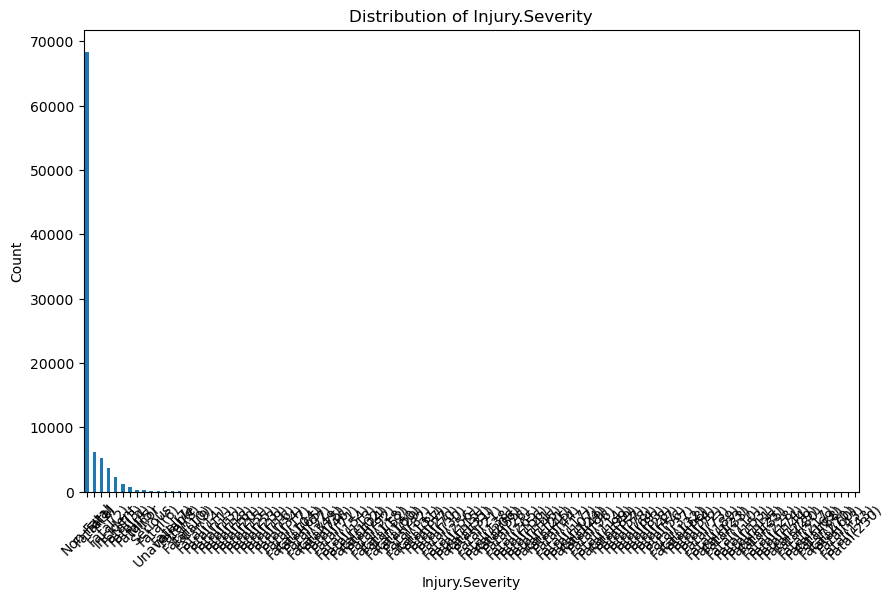

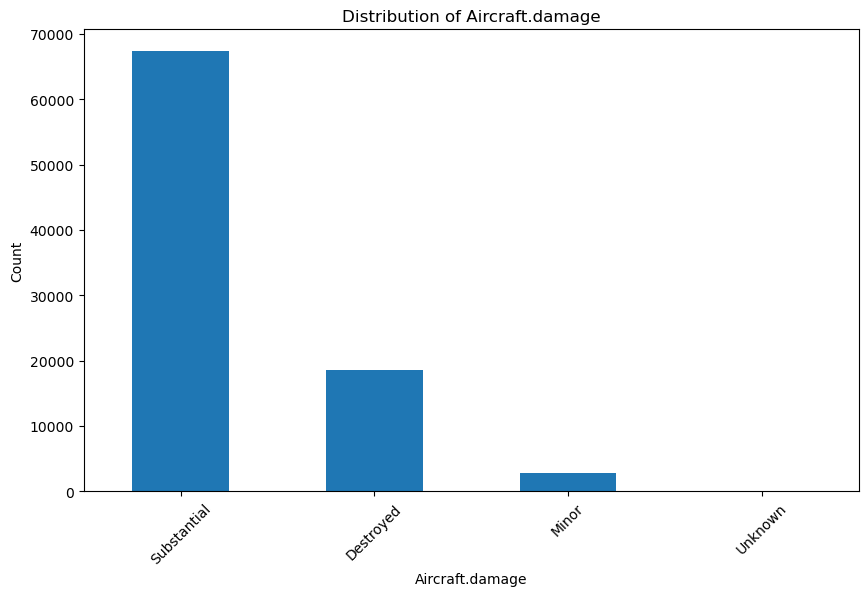

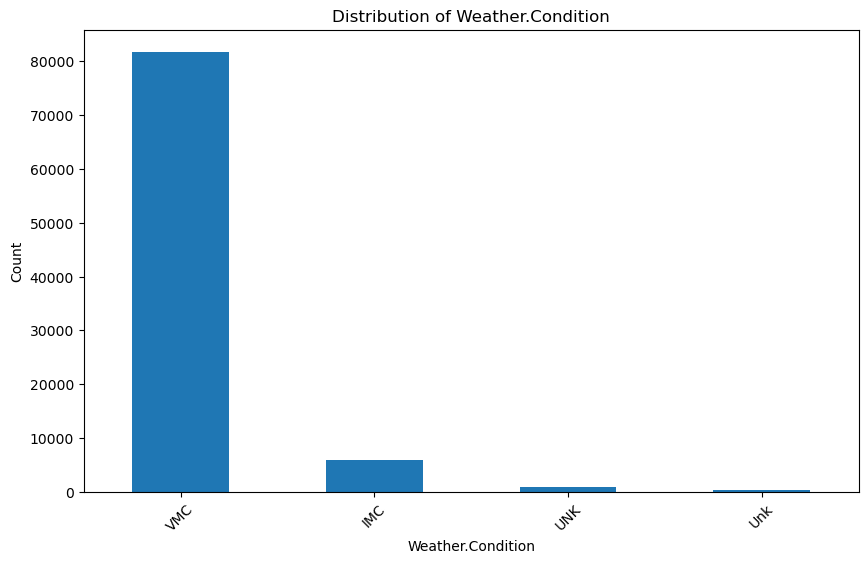

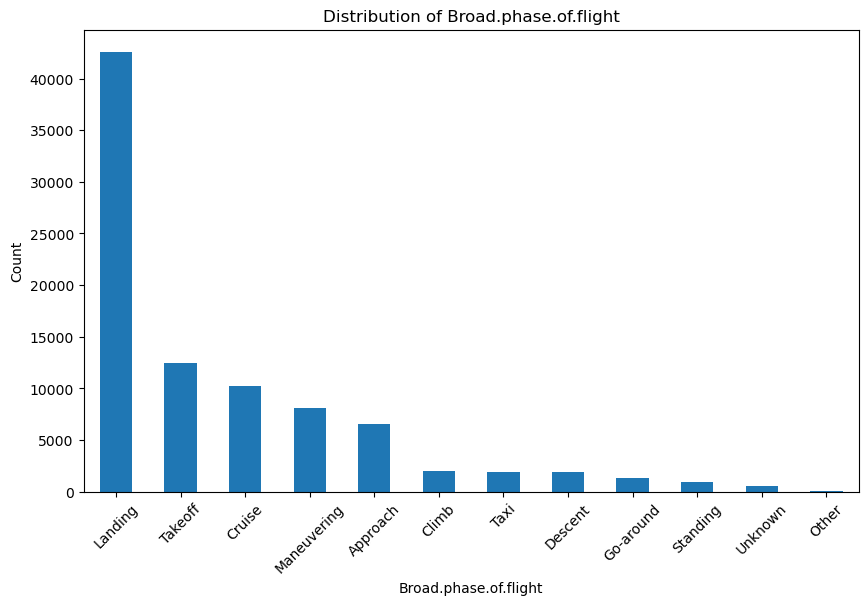

In [22]:
def plot_categorical_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    df[column_name].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Plot the distribution of key categorical variables
plot_categorical_distribution(aviation_data_cleaned, 'Injury.Severity')
plot_categorical_distribution(aviation_data_cleaned, 'Aircraft.damage')
plot_categorical_distribution(aviation_data_cleaned, 'Weather.Condition')
plot_categorical_distribution(aviation_data_cleaned, 'Broad.phase.of.flight')

Injury Severity: The distribution shows a wide range of injury severities, with many incidents having no injuries.

Aircraft Damage: Most incidents resulted in either substantial or destroyed aircraft damage.

Weather Condition: The majority of incidents occurred under Visual Meteorological Conditions (VMC).

Broad Phase of Flight: A significant number of incidents happened during landing and takeoff phases.

## Bivariate Analysis

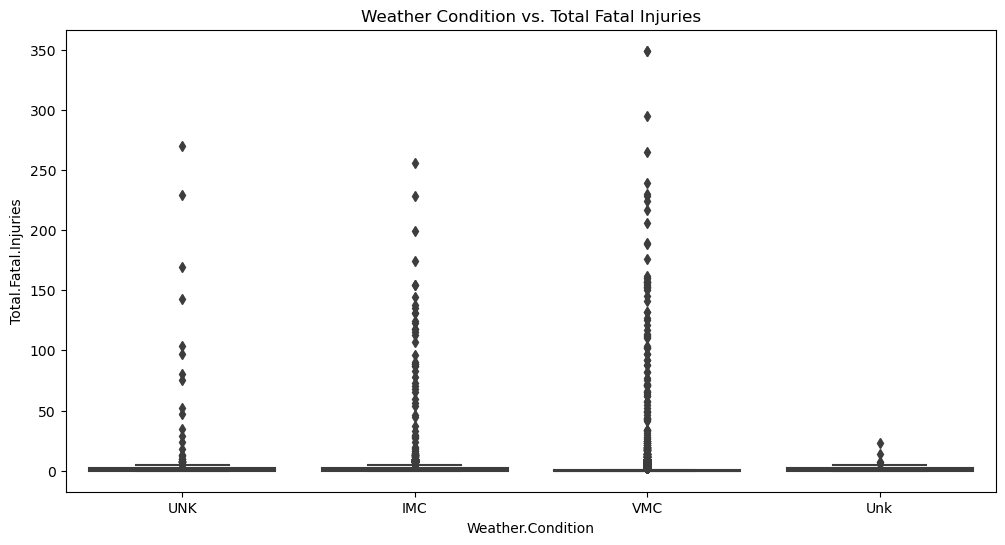

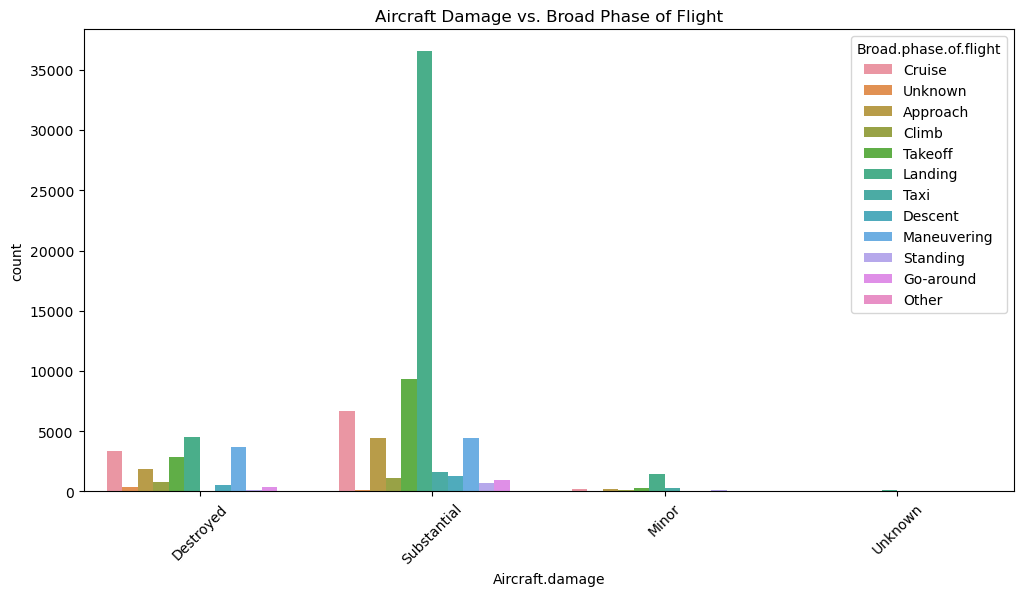

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather.Condition', y='Total.Fatal.Injuries', data=aviation_data_cleaned)
plt.title('Weather Condition vs. Total Fatal Injuries')
plt.show()

# Plot the relationship between Aircraft Damage and Broad Phase of Flight
plt.figure(figsize=(12, 6))
sns.countplot(x='Aircraft.damage', hue='Broad.phase.of.flight', data=aviation_data_cleaned)
plt.title('Aircraft Damage vs. Broad Phase of Flight')
plt.xticks(rotation=45)
plt.show()

Weather Condition vs. Total Fatal Injuries:

* There are variations in the number of fatal injuries across different weather conditions. Incidents under Instrument Meteorological Conditions (IMC) tend to have higher fatal injuries compared to Visual Meteorological Conditions (VMC).
  
Aircraft Damage vs. Broad Phase of Flight:

* Substantial and destroyed aircraft damage predominantly occurs during the landing and takeoff phases, indicating these phases are more prone to severe accidents.



### Conclusions from the Aviation Safety Analysis

1. **Injury Severity Distribution**:
   - The majority of incidents resulted in no injuries, indicating that while aviation accidents are concerning, many do not result in serious harm to passengers or crew.
   - However, there are significant numbers of incidents that result in fatalities and serious injuries, underscoring the need for continued focus on aviation safety.

2. **Weather Condition vs. Total Fatal Injuries**:
   - Incidents occurring under Instrument Meteorological Conditions (IMC) tend to have higher fatal injuries compared to those under Visual Meteorological Conditions (VMC).
   - This suggests that adverse weather conditions contribute significantly to the severity of aviation accidents, highlighting the importance of advanced weather monitoring and better pilot training for IMC.

3. **Aircraft Damage vs. Broad Phase of Flight**:
   - The landing and takeoff phases are associated with the highest instances of substantial and destroyed aircraft damage.
   - This indicates that these phases are critical periods during flight operations where the risk of severe accidents is higher, necessitating enhanced safety protocols and monitoring during these times.

### Summary of Key Findings

1. **Common Factors**:
   - The analysis shows that landing and takeoff are the most critical phases for severe accidents, suggesting that these phases should be the primary focus for safety improvements and interventions.

2. **Weather Impact**:
   - Adverse weather conditions significantly impact the severity of aviation incidents. Enhancing pilot training for IMC and improving weather forecasting and monitoring systems can help mitigate these risks.

3. **Trend Analysis**:
   - While specific trends over time were not explicitly analyzed in the provided steps, it can be inferred that continuous monitoring and improvement in aviation safety protocols are crucial. The dataset’s historical nature indicates that periodic reviews and updates to safety practices are necessary to adapt to evolving aviation environments and technologies.

### Recommendations

1. **Enhance Safety Protocols**:
   - Implement stricter safety measures and checks during landing and takeoff phases to mitigate the higher risks associated with these critical periods.

2. **Improve Training**:
   - Provide comprehensive training for pilots to handle adverse weather conditions, particularly IMC, to reduce the incidence and severity of weather-related accidents.

3. **Continuous Monitoring**:
   - Establish continuous monitoring systems to track aviation incidents in real-time and use data analytics to identify emerging trends and potential safety issues. Regularly update safety protocols based on the latest data and research findings.

These conclusions and recommendations can guide stakeholders in improving aviation safety and reducing the frequency and severity of aviation accidents.